Fig. 2c, Supp. Fig. 2

- input file: individual accuracy
- box-plot for each continent and ref method
- line-plot for each continent and ref method

In [1]:
fn = './s1_result/individual_acc.tsv'
outdir = 's2_result'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.makedirs(outdir, exist_ok=True)

In [3]:
# Nature style
import matplotlib.pyplot as plt

fontsize = 7
capsize = 1.5
plt.rcParams.update({
    # Figure size and DPI
    'figure.dpi': 300, # High DPI for initial saving
    'savefig.dpi': 300, # High DPI for output file
    'savefig.bbox': 'tight', # Removes excess white space around figure
    'savefig.transparent': True, # Make the background transparent
    
    # Font settings
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica'], # Use Helvetica or Arial
    'pdf.fonttype': 42,
    # size: 5-7 
    'font.size': fontsize, # Base size. Axes labels will be this size.
    'axes.titlesize': fontsize, # Size of the axes title
    'axes.labelsize': fontsize, # Size of the x and y labels
    'xtick.labelsize': fontsize, # Size of the x-tick labels
    'ytick.labelsize': fontsize, # Size of the y-tick labels
    'legend.fontsize': fontsize, # Size of the legend text
    
    # Line settings
    'lines.linewidth': .5,
    'lines.markersize': 2,
    
    # Axes settings
    'axes.linewidth': 0.5, # Width of the axes border
    'xtick.major.width': 0.5, # Width of the x-tick lines
    'ytick.major.width': 0.5, # Width of the y-tick lines
    'xtick.major.size': 3, # Length of the x-ticks
    'ytick.major.size': 3, # Length of the y-ticks
    
    # Other settings
    'legend.frameon': False, # Remove the box around the legend
    'legend.handlelength': 1.5, # Length of the legend lines
})

# Define the WIDTH of your figure in inches (Single column: 89 mm, double column: 183 mm, max height: 170 mm)
width_in_inches = 85/25.4 # 85 mm
height_in_inches = 85/25.4 # 85 mm
figsize=(width_in_inches, height_in_inches)


accuracies of 216 individuals

In [4]:
df = pd.read_csv('./s1_result/individual_acc.tsv', sep='\t')
# rename ref according to a dict
ref_map = {
    'snpbag_ft_omni': 'SNPBag omni', 
    'snpbag_base': 'SNPBag base', 
    'REF': 'REF', 
    'noREF': 'noREF'}
df['ref'] = df['ref'].map(ref_map)
ref_order = ['SNPBag omni', 'SNPBag base', 'REF', 'noREF']
df['ref'] = pd.Categorical(df['ref'], categories=ref_order, ordered=True)
palette = ['red', 'brown', 'deepskyblue', 'royalblue']

# rename continents according to a dict
continent_map = {
    'AFRICA': 'AFR', 
    'AMERICA': 'AMR', 
    'CENTRAL_SOUTH_ASIA': 'CSA', 
    'EAST_ASIA': 'EAS', 
    'EUROPE': 'EUR', 
    'MIDDLE_EAST': 'ME', 
    'OCEANIA': 'OC'}
df['continent'] = df['continent'].map(continent_map)
# print(df['continent'].unique())
continent_order = ['AFR', 'AMR', 'CSA', 'EAS', 'EUR', 'ME', 'OC']
df['continent'] = pd.Categorical(df['continent'], categories=continent_order, ordered=True)

print('len(df):\n', len(df))
print('df:\n', df)

# average accuracy of each ref and each sample
df_ref = df.groupby(['ref', 'sample'])['accuracy'].agg(acc='mean').reset_index()
# remove rows with acc is nan
df_ref = df_ref[df_ref['acc'].notna()]
print('len(df_ref):\n', len(df_ref))

# add continent to df_avg
sample2continent = df.groupby('sample')['continent'].first().to_dict()
df_ref['continent'] = df_ref['sample'].map(sample2continent)
print('len(df_ref):\n', len(df_ref))
df_ref.to_csv('./s2_result/continent_acc.tsv', sep='\t', index=False)

len(df):
 4320
df:
                  sample  num_correct  num_total   accuracy            method  \
0                     0        63679      65690  96.938651       snpbag_base   
1                     1        63790      65690  97.107627       snpbag_base   
2                     2        63703      65690  96.975186       snpbag_base   
3                     3        63999      65690  97.425788       snpbag_base   
4                     4        64212      65690  97.750038       snpbag_base   
...                 ...          ...        ...        ...               ...   
4315  LP6005443-DNA_G02        60858      65687  92.648469  eagle_REF_impute   
4316  LP6005443-DNA_G08        58622      65687  89.244447  eagle_REF_impute   
4317  LP6005592-DNA_C03        60788      65687  92.541903  eagle_REF_impute   
4318          SS6004467        64011      65687  97.448506  eagle_REF_impute   
4319          SS6004473        58152      65687  88.528933  eagle_REF_impute   

              ref c

/tmp/ipykernel_2698308/112879062.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ref = df.groupby(['ref', 'sample'])['accuracy'].agg(acc='mean').reset_index()


In [5]:
print(len(df_ref))

864


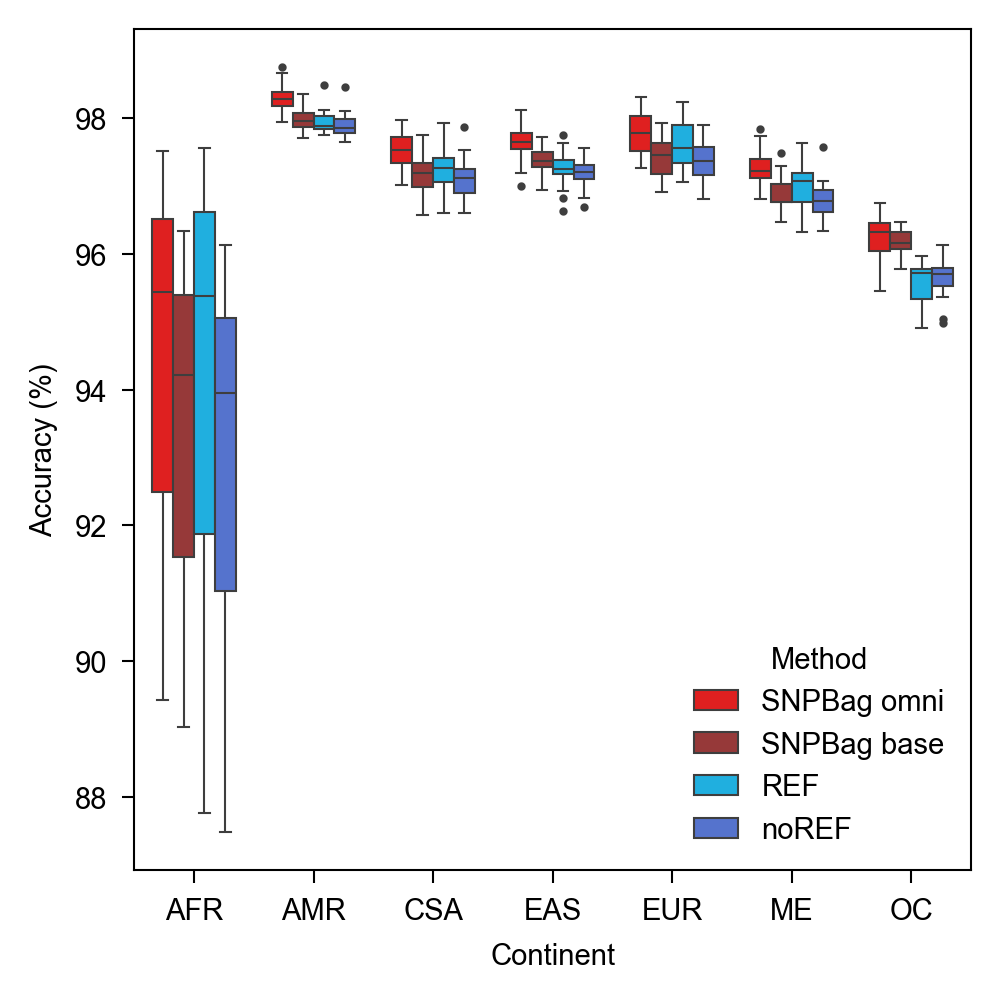

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=figsize)

# Boxplot: accuracy by continent and ref, remove box outlines
sns.boxplot(
    data=df_ref,
    x='continent',
    y='acc',
    hue='ref',
    order=continent_order,
    hue_order=ref_order,
    palette=palette,
    width=0.7,
    fliersize=1,
    linewidth=0.5,  # Remove box outlines
)   

plt.xlabel('Continent')
plt.ylabel('Accuracy (%)')
# plt.title('Accuracy by Continent and Method')
# plt.xticks(continent_pos, custom_labels, rotation=0)
plt.legend(title='Method')
# plt.ylim(87, 100)
plt.tight_layout()
plt.savefig(f'{outdir}/continent_comparison_boxplot.pdf')
plt.show()

In [7]:
# Prepare data for barplot: mean and standard error of accuracy for each method
def standard_error(x):
    return np.std(x) / np.sqrt(len(x))

def standard_deviation(x):
    return np.std(x)

def confidence_interval(x):
    return np.std(x) * 1.96 / np.sqrt(len(x))

In [8]:
df_stats = df_ref.groupby(['continent', 'ref'])['acc'].agg(mean='mean', eb=standard_error).reset_index()
print('df_stats:\n', df_stats )

df_stats:
    continent          ref       mean        eb
0        AFR  SNPBag omni  94.246026  0.487580
1        AFR  SNPBag base  93.325794  0.439456
2        AFR          REF  93.882224  0.594860
3        AFR        noREF  92.808777  0.499384
4        AMR  SNPBag omni  98.290988  0.046299
5        AMR  SNPBag base  97.980667  0.036375
6        AMR          REF  97.943606  0.038233
7        AMR        noREF  97.898265  0.040930
8        CSA  SNPBag omni  97.533575  0.042942
9        CSA  SNPBag base  97.170083  0.045905
10       CSA          REF  97.279306  0.048392
11       CSA        noREF  97.089212  0.044101
12       EAS  SNPBag omni  97.650983  0.024404
13       EAS  SNPBag base  97.382571  0.021028
14       EAS          REF  97.272529  0.021945
15       EAS        noREF  97.194815  0.020150
16       EUR  SNPBag omni  97.777772  0.050869
17       EUR  SNPBag base  97.400289  0.047653
18       EUR          REF  97.602630  0.058156
19       EUR        noREF  97.369041  0.048539
20

/tmp/ipykernel_2698308/4198850190.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stats = df_ref.groupby(['continent', 'ref'])['acc'].agg(mean='mean', eb=standard_error).reset_index()


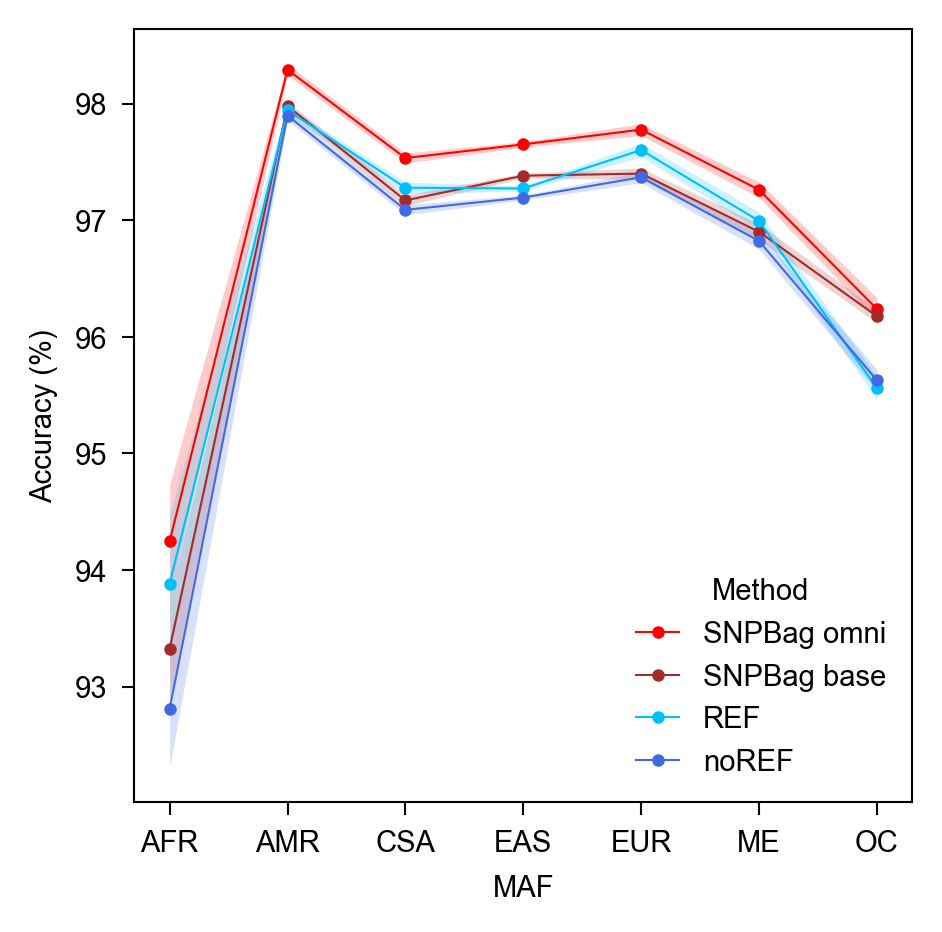

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=figsize)

# Prepare x-axis: use continent as categorical, but for lineplot, we need numeric positions
# continent_order = list(df_ref['continent'].unique())
continent_pos = np.arange(len(continent_order))
# custom_labels = ['AFR', 'AMR', 'CSA', 'EAS', 'EUR', 'ME', 'OC']

# Plot each ref as a separate line with shadow for mean ± se
for idx, ref in enumerate(df_stats['ref'].cat.categories):
    df = df_stats[df_stats['ref'] == ref]
    # Ensure order matches continents
    # df = df.set_index('continent').reindex(continents).reset_index()
    means = df['mean'].values
    eb = df['eb'].values
    color = palette[idx]
    plt.plot(continent_pos, means, marker='o', label=ref, color=color, markersize=2)
    # Plot shadow for mean ± se
    plt.fill_between(
        continent_pos,
        means - eb,
        means + eb,
        color=color,
        alpha=0.2,
        linewidth=0
    )

plt.xlabel('MAF')
plt.ylabel('Accuracy (%)')
# plt.title('Minor Allele Frequency')
plt.xticks(continent_pos, continent_order, rotation=0)
plt.legend(title='Method')
# plt.ylim(93, 99)
plt.savefig(f'{outdir}/continent_comparison_lines.pdf')
plt.show()

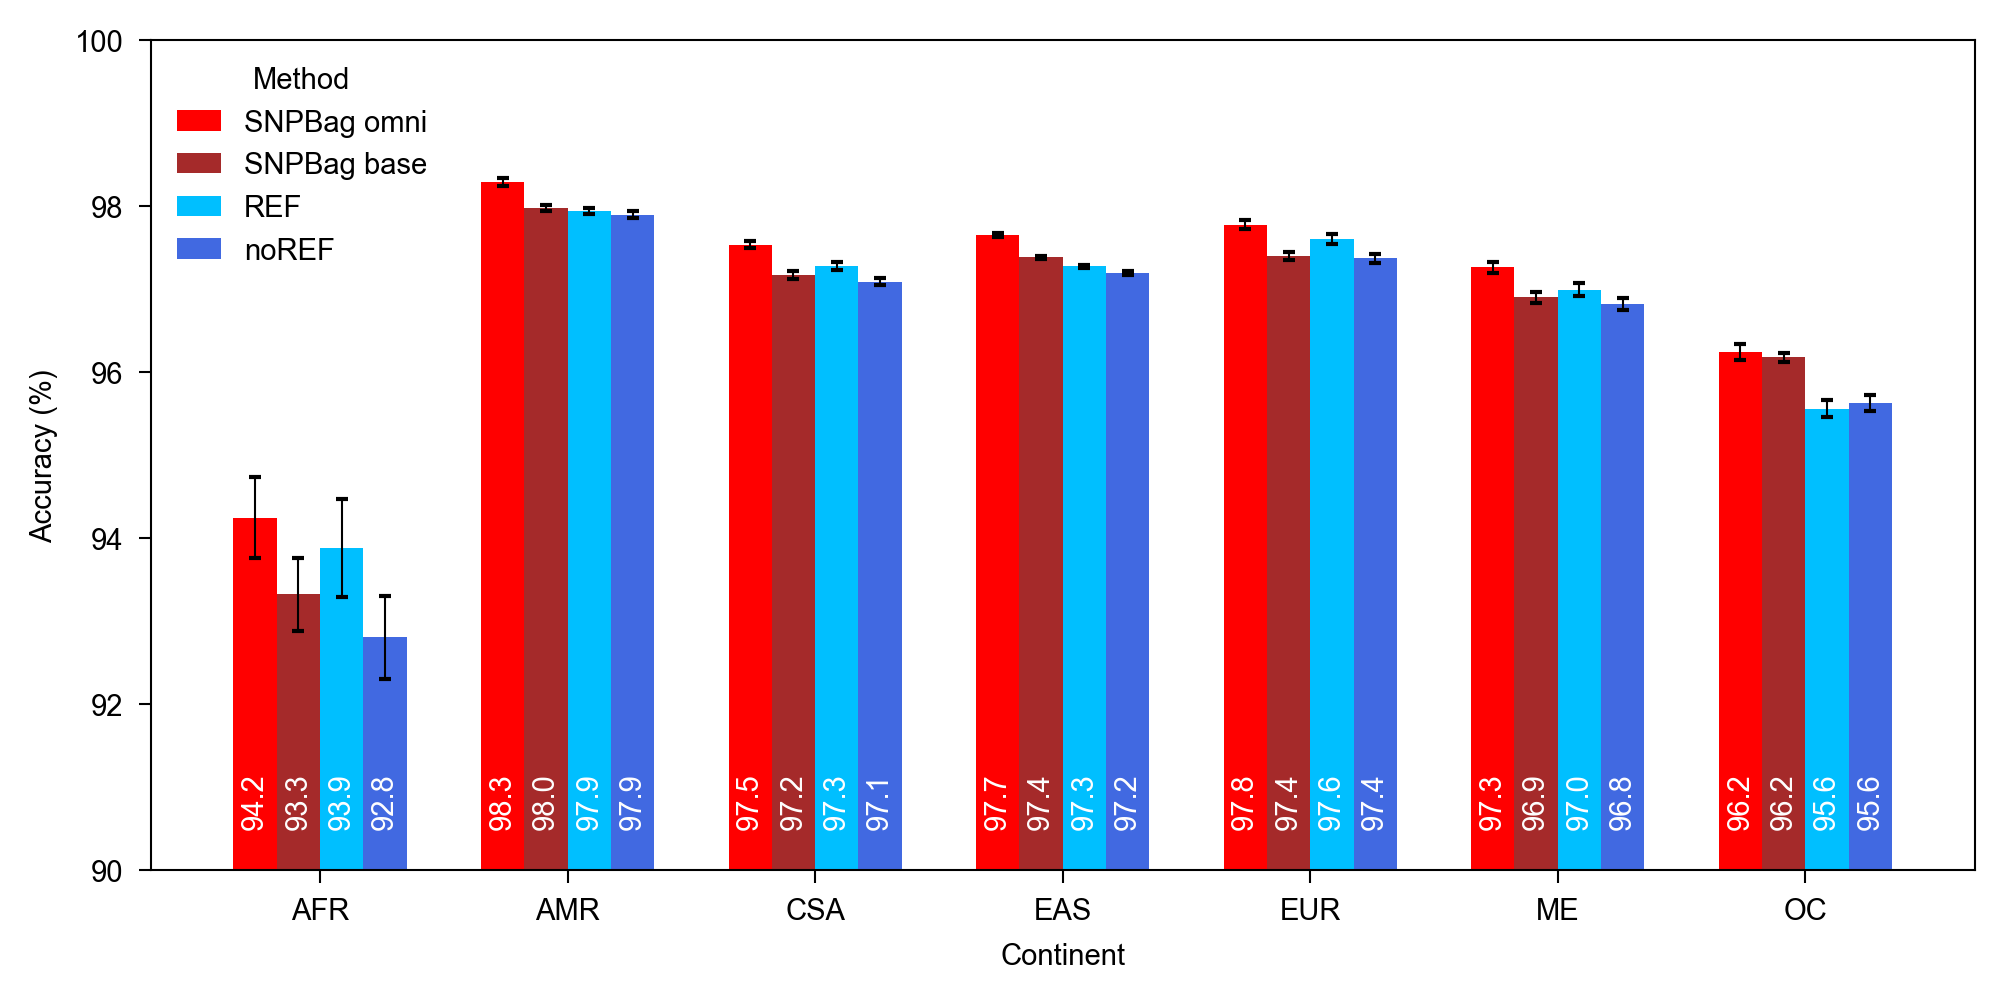

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(width_in_inches*2, height_in_inches))

# Prepare x-axis: use continent as categorical, but for barplot, we need numeric positions
n_refs = len(df_stats['ref'].cat.categories)
n_continents = len(continent_order)
bar_width = 0.7 / n_refs  # total width divided by number of bars per group
continent_pos = np.arange(n_continents)

# Plot each ref as a separate bar group with error bars
for idx, ref in enumerate(df_stats['ref'].cat.categories):
    df = df_stats[df_stats['ref'] == ref]
    # Ensure order matches continents
    # df = df.set_index('continent').reindex(continents).reset_index()
    means = df['mean'].values
    eb = df['eb'].values
    color = palette[idx]
    # Offset each bar group
    positions = continent_pos + (idx - n_refs/2) * bar_width + bar_width/2
    plt.bar(positions, means, width=bar_width, label=ref, color=color, yerr=eb, capsize=capsize, alpha=1, linewidth=0)

    # Add value at the top of each bar, in white
    for x, y, err in zip(positions, means, eb):
        plt.text(
            x=x,
            y=90.5,  # slightly above the error bar for visibility
            s=f"{y:.1f}",
            ha='center',
            va='bottom',
            color='white',
            fontsize=fontsize,
            # fontweight='bold',
            clip_on=True,
            rotation=90
        )

plt.xlabel('Continent')
plt.ylabel('Accuracy (%)')
# plt.title('Continent')
plt.xticks(continent_pos, continent_order, rotation=0)
plt.legend(title='Method', loc='upper left', fontsize=fontsize, title_fontsize=fontsize)
plt.ylim(90, 100)
plt.tight_layout()
plt.savefig(f'{outdir}/continent_comparison_bars.pdf')
plt.show()